In [14]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
# from pyjet import cluster
from pyjet import cluster,DTYPE_PTEPM
from pyjet.testdata import get_event
import h5py as h5

In [2]:
outfile = "/local_disk/james/Htet_data/events.h5"
hf = h5.File(outfile, 'r')
print(hf["df"].keys())

<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>


In [3]:
keys = list(hf["df"].keys())


In [4]:
keys = list(hf["df"].keys())
for key in keys:
    print(hf["df"][key])

<HDF5 dataset "axis0": shape (2101,), type "<i8">
<HDF5 dataset "axis1": shape (1100000,), type "<i8">
<HDF5 dataset "block0_items": shape (2101,), type "<i8">
<HDF5 dataset "block0_values": shape (1100000, 2101), type "<f8">


In [5]:
df = pd.read_hdf(outfile, "df")
# df

In [10]:
df.shape

(1100000, 2101)

In [11]:
events_combined = df.T

In [12]:
events_combined.shape

(2101, 1100000)

In [19]:
leadpT = {}
leadeta = {}
leadphi = {}

alljets = {}
N = 3000
for mytype in ['background','signal']:
    leadpT[mytype]=[]
    leadeta[mytype]=[]
    leadphi[mytype]=[]
    
    alljets[mytype]=[]
#     for i in range(np.shape(events_combined)[1]):
    for i in tqdm(range(N)):

        if (i%1000==0):
            print(mytype,i)
            pass
        issignal = events_combined[i][2100]
        if (mytype=='background' and issignal):
            continue
        elif (mytype=='signal' and issignal==0):
             continue
        pseudojets_input = np.zeros(len([x for x in events_combined[i][::3] if x > 0]), dtype=DTYPE_PTEPM)
        for j in range(700):
            if (events_combined[i][j*3]>0):
                pseudojets_input[j]['pT'] = events_combined[i][j*3]
                pseudojets_input[j]['eta'] = events_combined[i][j*3+1]
                pseudojets_input[j]['phi'] = events_combined[i][j*3+2]
                pass
            pass
        sequence = cluster(pseudojets_input, R=1.0, p=-1)
        jets = sequence.inclusive_jets(ptmin=20)
        leadpT[mytype] += [jets[0].pt]
        leadeta[mytype] += [jets[0].eta]
        leadphi[mytype] += [jets[0].phi]
        
        alljets[mytype] += [jets]
        pass

  0%|          | 7/3000 [00:00<02:04, 24.12it/s]

background 0


 34%|███▎      | 1005/3000 [00:31<01:01, 32.41it/s]

background 1000


 67%|██████▋   | 2006/3000 [01:02<00:33, 29.45it/s]

background 2000


  2%|▏         | 72/3000 [00:00<00:12, 231.96it/s]

signal 0


 35%|███▌      | 1055/3000 [00:03<00:06, 314.13it/s]

signal 1000


 70%|██████▉   | 2093/3000 [00:05<00:02, 371.05it/s]

signal 2000


100%|██████████| 3000/3000 [00:08<00:00, 355.34it/s]


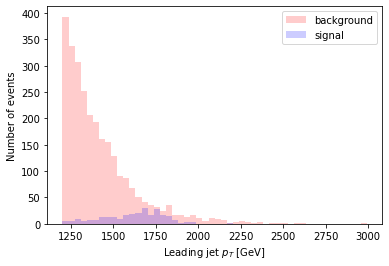

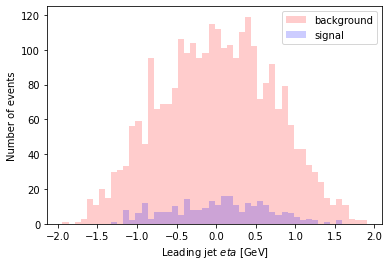

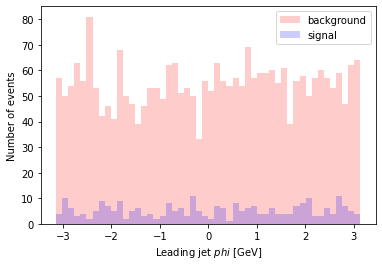

In [21]:
#Let's make some very simple plots.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(leadpT['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(leadpT['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'Leading jet $p_{T}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()

n,b,p = plt.hist(leadeta['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(leadeta['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'Leading jet $eta$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()

n,b,p = plt.hist(leadphi['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(leadphi['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'Leading jet $phi$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()
# plt.savefig("leadjetpt.pdf")
